# Glass Identification

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
glass_df=pd.read_csv("glass.csv")
glass_df

1       RI     Na    Mg    Al     Si     k    Ca    Ba   Fe  Type
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 11 columns]

In [3]:
glass_df.head()

1       RI     Na    Mg    Al     Si     k    Ca   Ba   Fe  Type
0  1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
glass_df.tail()

1       RI     Na   Mg    Al     Si     k    Ca    Ba   Fe  Type
209  210  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  211  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  212  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  213  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  214  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7

In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   k       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
glass_df.describe()

1          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                k          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.122500    8.240000    0.000000    0.000000    1.000000  
50%      0.555000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.172500    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

Text(0.5, 1.0, 'Count of Glass Types')

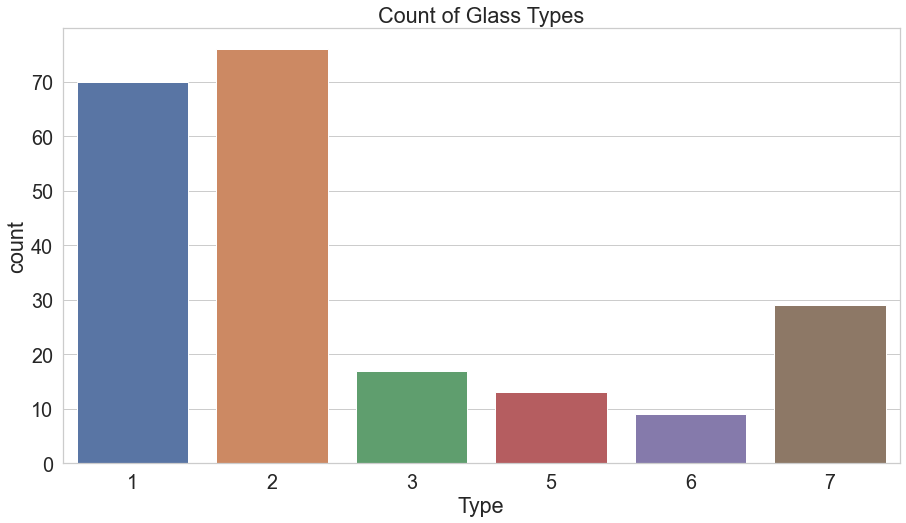

In [7]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=glass_df).set_title('Count of Glass Types')

In [8]:
glass_df.groupby('Type', as_index=False).mean()

Type      1        RI         Na        Mg        Al         Si         k  \
0     1   35.5  1.518718  13.242286  3.552429  1.163857  72.619143  0.447429   
1     2  108.5  1.518619  13.111711  3.002105  1.408158  72.598026  0.521053   
2     3  155.0  1.517964  13.437059  3.543529  1.201176  72.404706  0.406471   
3     5  170.0  1.518928  12.827692  0.773846  2.033846  72.366154  1.470000   
4     6  181.0  1.517456  14.646667  1.305556  1.366667  73.206667  0.000000   
5     7  200.0  1.517116  14.442069  0.538276  2.122759  72.965862  0.325172   

          Ca        Ba        Fe  
0   8.797286  0.012714  0.057000  
1   9.073684  0.050263  0.079737  
2   8.782941  0.008824  0.057059  
3  10.123846  0.187692  0.060769  
4   9.356667  0.000000  0.000000  
5   8.491379  1.040000  0.013448

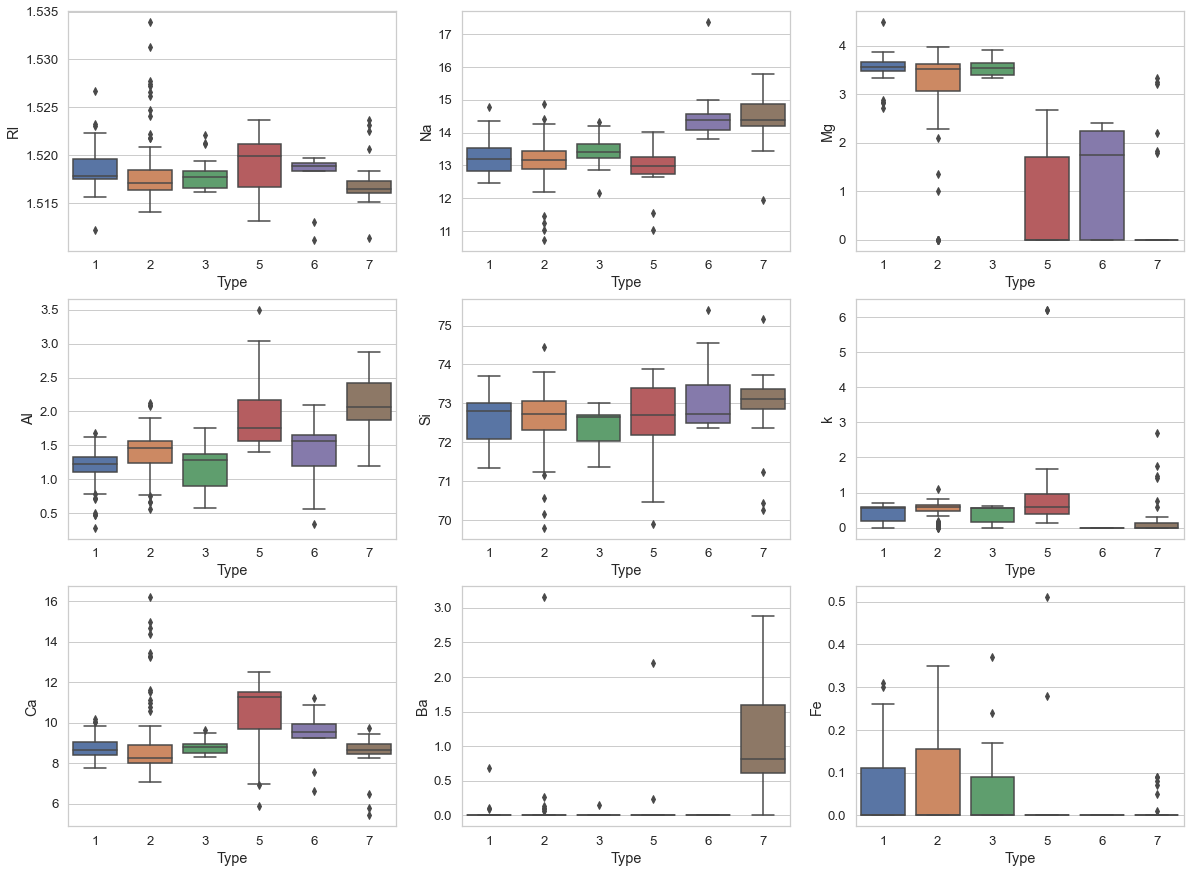

In [9]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='k', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

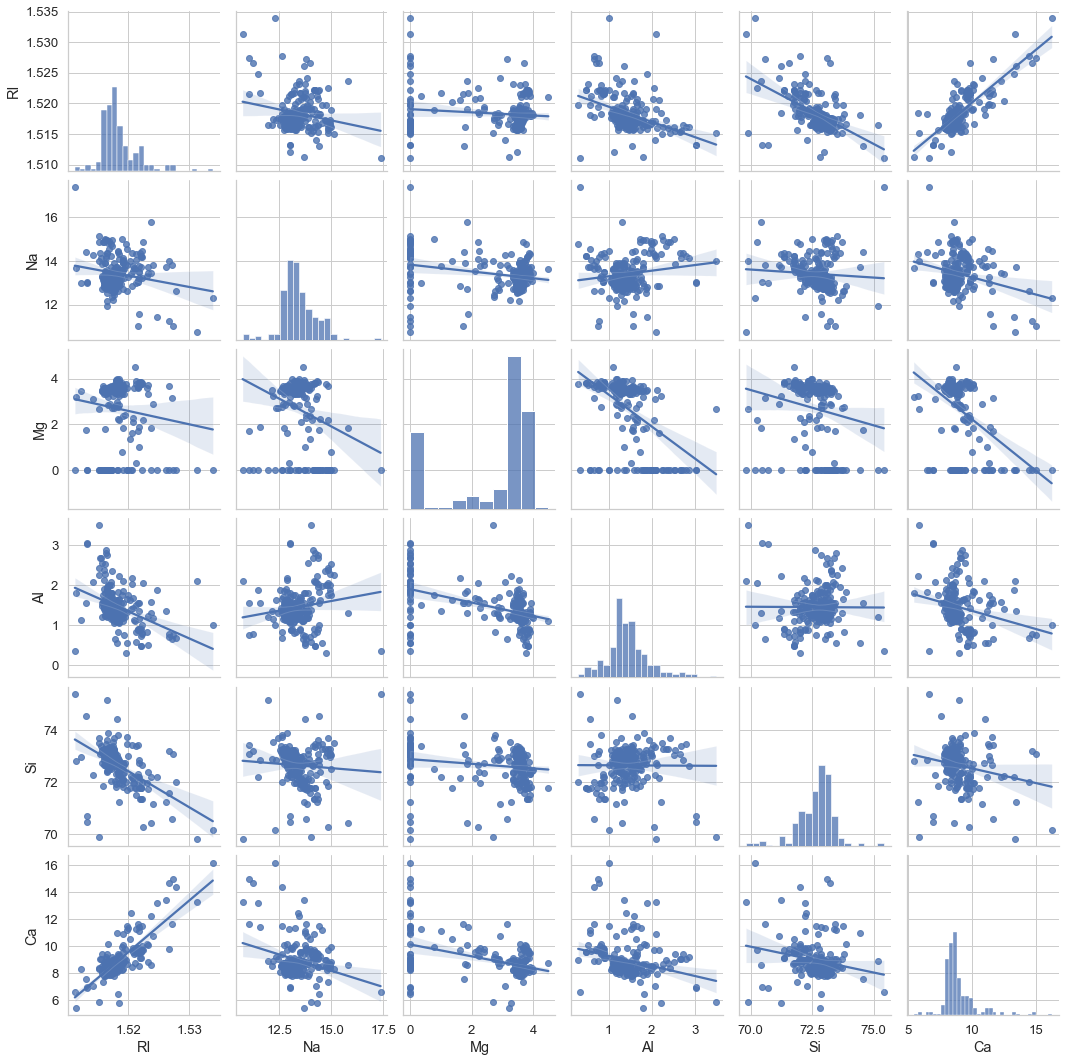

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

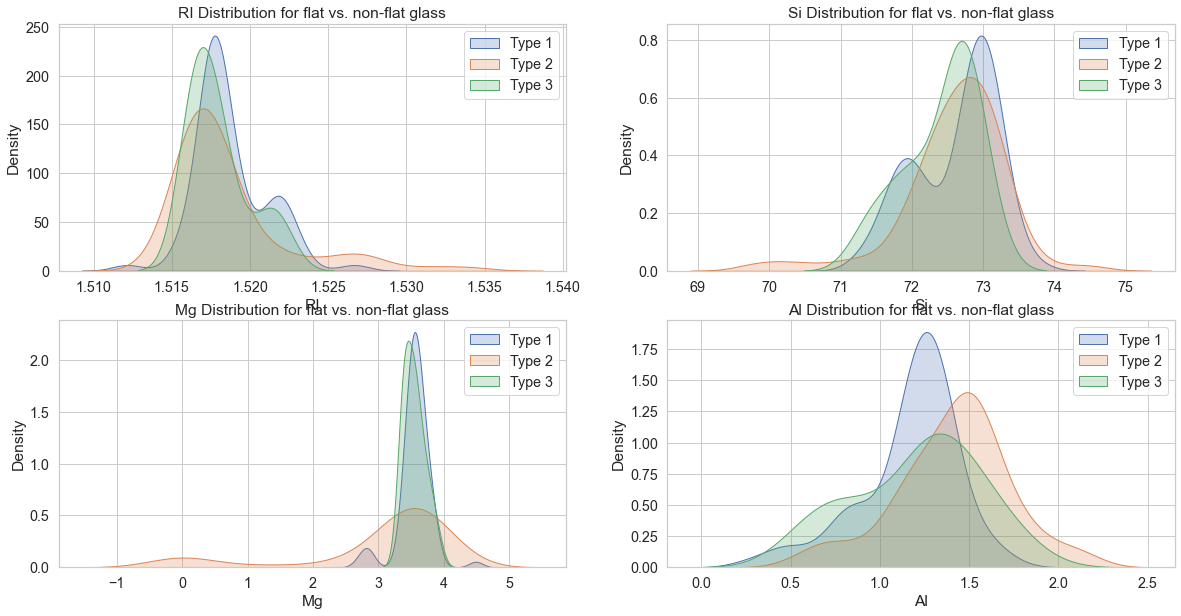

In [11]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["RI"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 3], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,2)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 3], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])
plt.subplot(2,2,4)
sns.kdeplot(glass_df["Al"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 3], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

<AxesSubplot:>

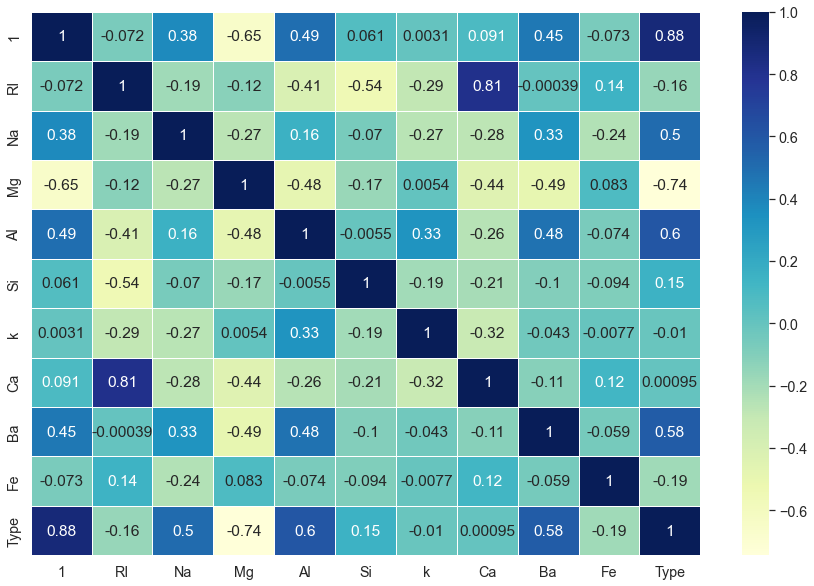

In [12]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


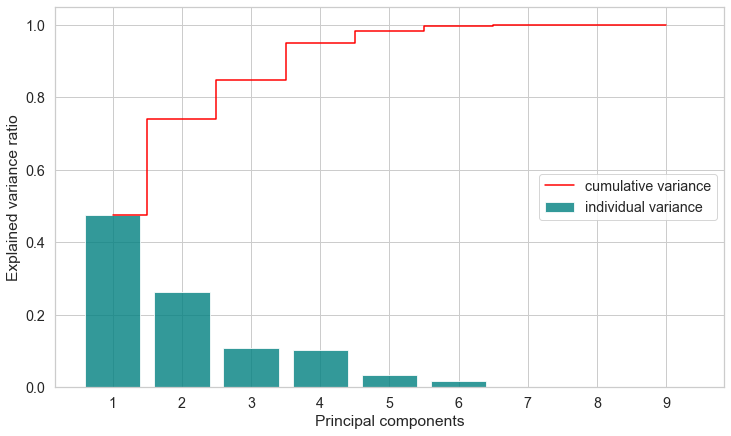

In [13]:
X_var = glass_df[['RI','Na','Mg','Al','Si','k','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [14]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

In [15]:
X = X_reduced
y = glass_df["Type"].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [18]:
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)


gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

In [19]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[0.19805872 0.32790763 0.19281803 0.23018103 0.05103459]
[0.31377335 0.32296928 0.05489302 0.21178263 0.09658172]
[0.3352154  0.28779865 0.13393196 0.17160844 0.07144555]


In [20]:
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

Model  Accuracy
0  Support Vector Machine  0.753846
1          Gradient Boost  0.676923
2           Decision Tree  0.692308
3           Random Forest  0.738462

In [21]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [22]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.6923076923076923

Text(197.86, 0.5, 'predicted label')

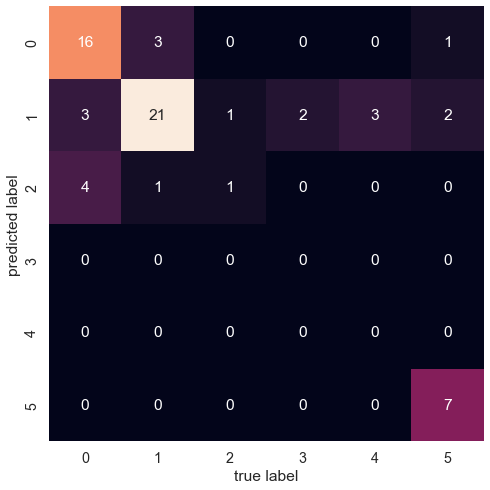

In [23]:
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [24]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.70      0.74        23
           2       0.66      0.84      0.74        25
           3       0.17      0.50      0.25         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.70      0.82        10

    accuracy                           0.69        65
   macro avg       0.44      0.46      0.43        65
weighted avg       0.69      0.69      0.68        65



In [25]:
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_var.iloc[:,0:5],y)

SVC(C=10, gamma=0.1)

In [26]:
from IPython.display import display
def f(RI, Na, Mg, Al, Si):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si]])
    print("The Glass Type is {}".format(y_val))

In [27]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [28]:
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76))

interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si)>

# Student grades prediction

In [29]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
grades_df=pd.read_csv("Grades.csv")

In [32]:
grades_df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [33]:
grades_df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [34]:
grades_df.tail()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[5 rows x 43 columns]

In [35]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [36]:
grades_df.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

In [37]:
grades_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [38]:
grades_df.isnull().sum().sum()

425

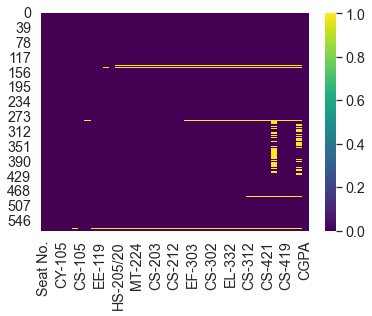

In [39]:
sns.heatmap(grades_df.isnull(), cmap='viridis')
plt.show()

In [40]:
grades_df.replace(np.nan,0, inplace = True)
grades_df.head(10)

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
5  CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
6  CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
7  CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
8  CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
9  CS-97010      A      B     C+         B      B     A-      C     B-     A-   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
5  ...      C     B-     C+     C+     A-     A-     B+     B-      B  3.026  
6  ...     B-      C     B+     B-      A     A-     B+     B+      A  2.957  
7  ...     D+     B+     B+      C      A     B+     A-     A-     A-  3.043  
8  ...     B+      B     B-     C+      A     A-     B+     A-      A  3.358  
9  ...     C+     B-     B+     B-      A      A     A-      B      A  3.247  

[10 rows x 43 columns]

In [41]:
input = grades_df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = grades_df[["CGPA"]]

In [42]:
target.head()

CGPA
0  2.205
1  2.008
2  3.608
3  1.906
4  3.448

In [43]:
pd.unique(grades_df["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [44]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}

In [45]:
type(input)

pandas.core.frame.DataFrame

In [46]:
for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()
     

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0     2.7     1.4     1.7        2.0     1.7     1.4     1.0     1.7     2.7   
1     4.0     1.0     1.4        1.0     2.7     2.0     1.0     4.0     1.4   
2     4.0     3.0     4.0        2.7     3.4     4.0     2.7     3.4     3.7   
3     1.0     2.4     1.4        1.0     1.0     3.7     1.4     1.7     1.0   
4     3.7     3.7     3.7        3.4     4.0     4.0     3.7     3.4     4.0   

   ME-107  ...  EF-303  HS-304  CS-301  CS-302  TC-383  EL-332  CS-318  \
0     1.7  ...     1.7     2.4     3.0     2.0     2.4     2.0     1.7   
1     1.0  ...     1.0     1.7     3.7     1.4     1.7     2.0     3.7   
2     3.7  ...     2.4     4.0     3.4     3.7     3.0     3.4     3.7   
3     2.4  ...     1.0     2.7     1.0     2.7     1.4     1.4     3.4   
4     3.7  ...     1.7     3.7     2.7     3.7     2.4     3.7     2.7   

   CS-306  CS-312  CS-317  
0     2.0     1.7     1.7  
1     1.0     1.4     1.0  
2     3.7     3.0     3.0  
3     1.7     1.4     2.0  
4     3.7     2.7     3.4  

[5 rows x 33 columns]

In [47]:
grades_df = pd.concat([input, target], axis=1)

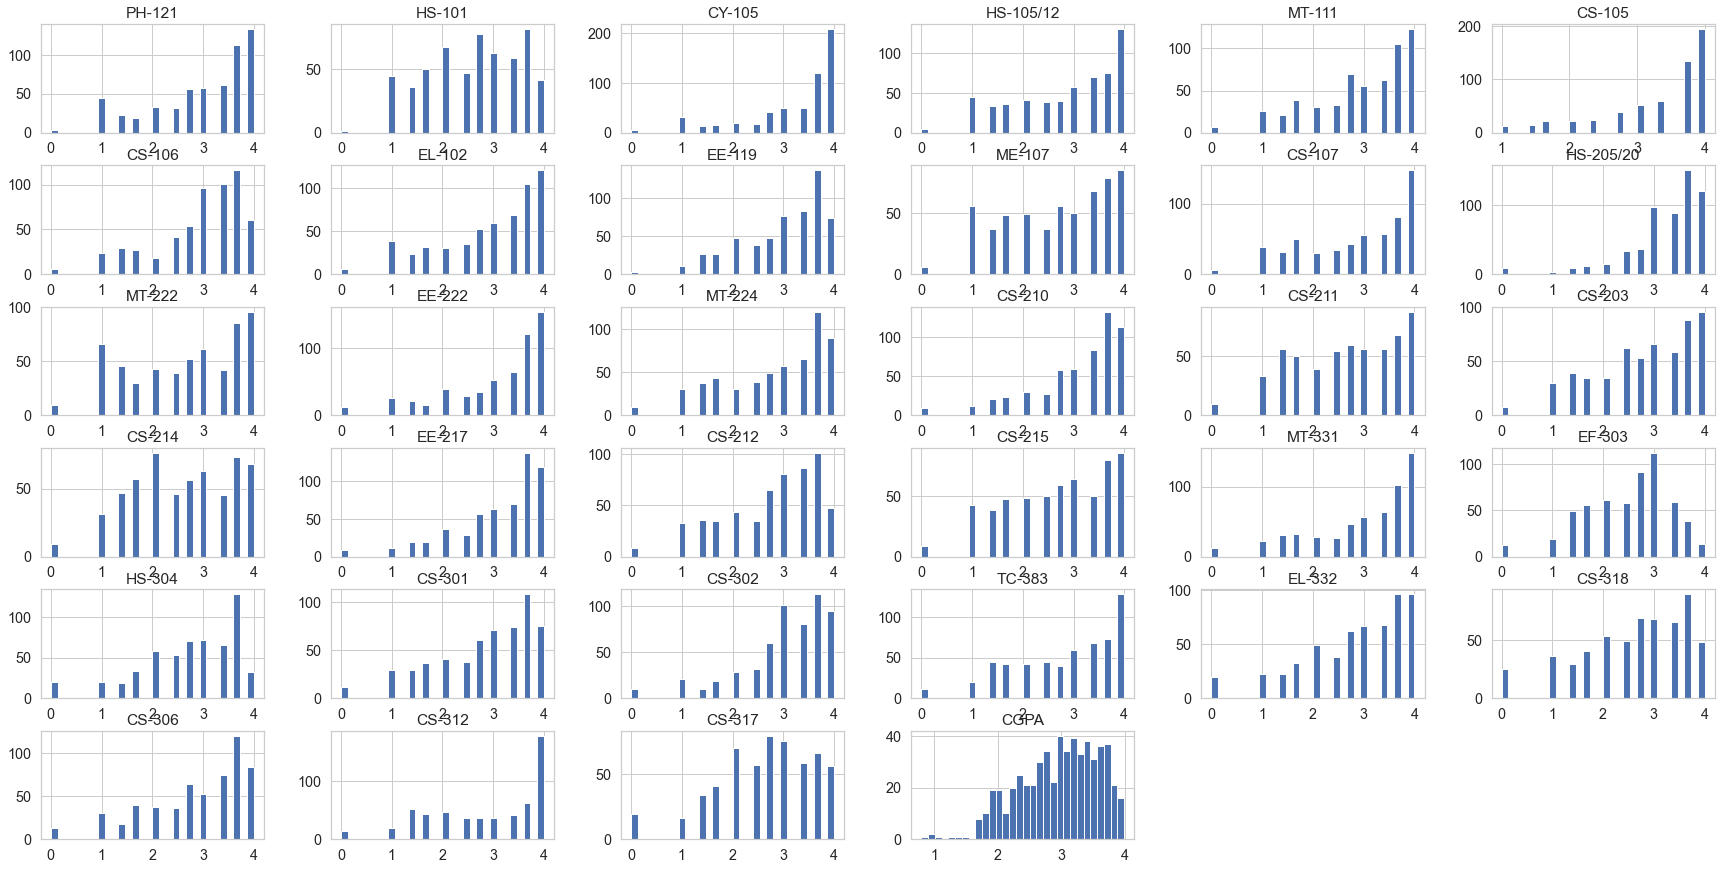

In [48]:
grades_df.hist(bins=30,figsize=(30,15))
plt.show()

<AxesSubplot:>

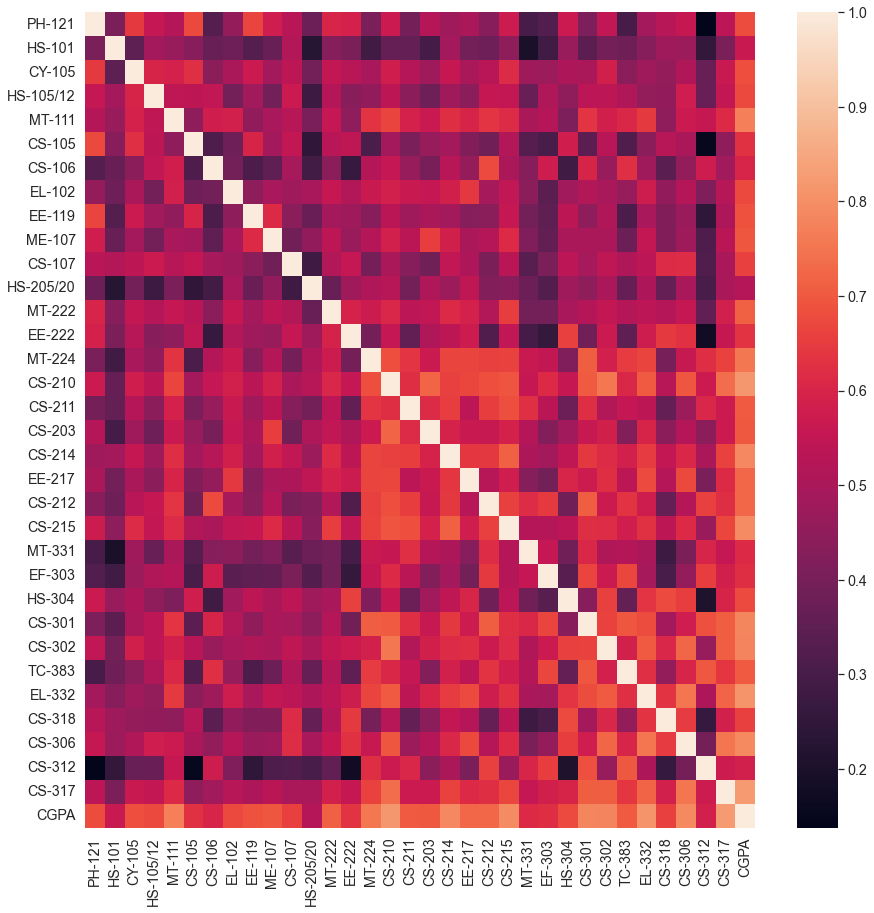

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(grades_df.corr())

In [50]:
grades_df.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.018389    2.628371    3.262697    2.878984    2.988091    3.329247   
std      0.971594    0.908402    0.932997    1.019208    0.954343    0.799826   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      2.400000    2.000000    2.700000    2.000000    2.400000    3.000000   
50%      3.400000    2.700000    3.700000    3.000000    3.400000    3.700000   
75%      3.700000    3.400000    4.000000    3.700000    3.700000    4.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-106      EL-102      EE-119      ME-107  ...      HS-304  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     2.961996    2.969877    3.020140    2.698599  ...    2.761646   
std      0.869226    0.981676    0.839463    1.029323  ...    0.955712   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.400000    2.400000    2.400000    1.700000  ...    2.000000   
50%      3.000000    3.400000    3.400000    2.700000  ...    3.000000   
75%      3.700000    3.700000    3.700000    3.700000  ...    3.700000   
max      4.000000    4.000000    4.000000    4.000000  ...    4.000000   

           CS-301      CS-302      TC-383      EL-332      CS-318      CS-306  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     2.850788    3.050088    2.873730    2.863748    2.628371    2.892119   
std      0.970483    0.877124    1.017053    1.009585    1.035205    0.989909   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.700000    2.000000    2.000000    2.000000    2.400000   
50%      3.000000    3.400000    3.000000    3.000000    2.700000    3.000000   
75%      3.700000    3.700000    3.700000    3.700000    3.400000    3.700000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           CS-312      CS-317        CGPA  
count  571.000000  571.000000  571.000000  
mean     2.892294    2.651138    2.954888  
std      1.095450    0.952455    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.000000    2.538000  
50%      3.000000    2.700000    3.029000  
75%      4.000000    3.400000    3.451000  
max      4.000000    4.000000    3.985000  

[8 rows x 34 columns]

In [51]:
grades_df.to_csv('cleaned_data.csv')

In [52]:
model1_columns = []
model2_columns = []
model3_columns = []
for item in [input]:
 for i in item:
   if i[3]=='1':
    model1_columns.append(i)
   elif i[3]=='2':
    model2_columns.append(i)
   else:
    model3_columns.append(i)

model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns

In [53]:
labels = grades_df['CGPA'].values
features = grades_df[list(model1_columns)].values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [55]:
from sklearn import linear_model

lr_1 = linear_model.LinearRegression()

lr_1.fit(X_train, y_train)

LinearRegression()

In [56]:
y_train_predict = lr_1.predict(X_train)

y_test_predict = lr_1.predict(X_test)

In [57]:
input_lr=[]
input_lr.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_lr )
print(lr_1.predict(input_lr ))

[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[2.02003247]


In [58]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) 
mae_test = mean_absolute_error(y_test, y_test_predict) 
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_1.score(X_test, y_test)
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.2291590678401302
MAE is 0.1787663186712231
---------------------------------------
The model performance for testing set
RMSE is 0.24843326185960504
MAE is 0.19573881220009162
---------------------------------------
The score of model for testing set
Test score 0.83


In [59]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

Actual   Predict
0     3.863  3.804364
1     0.998  1.321118
2     2.971  3.097353
3     2.861  3.144470
4     3.350  3.648897
..      ...       ...
167   3.345  3.375008
168   2.254  2.243917
169   3.772  3.517520
170   2.995  3.007397
171   1.886  2.611005

[172 rows x 2 columns]

In [60]:
idx= np.random.choice(X_test.shape[0])
print ("Predicted CGPA :", y_test_predict[idx])
print ("Actual CGPA :", y_test[idx])

Predicted CGPA : 2.930812152492896
Actual CGPA : 2.821


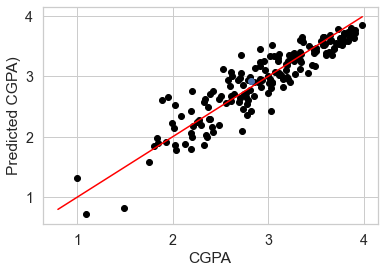

In [61]:
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA)')
plt.plot([grades_df["CGPA"].min(), grades_df["CGPA"].max()], [grades_df["CGPA"].min(), grades_df["CGPA"].max()], color='red')
plt.show()

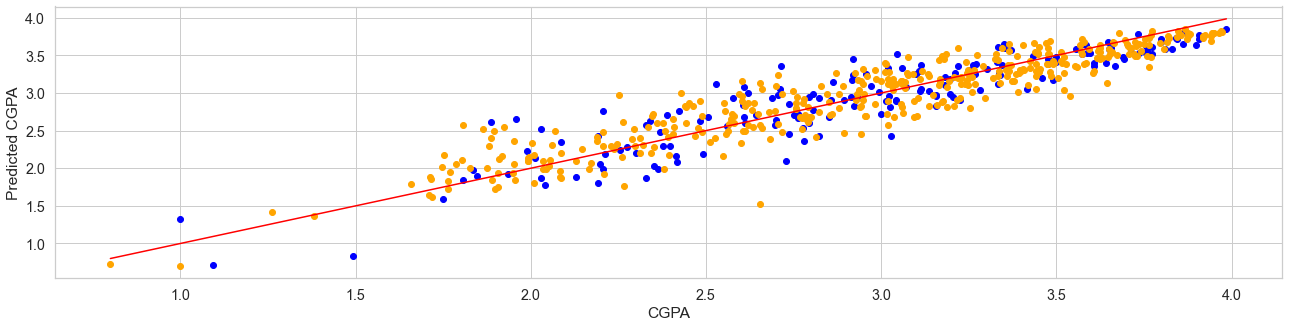

In [62]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([grades_df['CGPA'].min(), grades_df['CGPA'].max()], [grades_df['CGPA'].min(), grades_df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()
     

In [63]:
labels = grades_df['CGPA'].values
features = grades_df[list(model2_columns)].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
     

In [65]:
from sklearn import linear_model

lr_2 = linear_model.LinearRegression()

lr_2.fit(X_train, y_train)

LinearRegression()

In [66]:
y_train_predict = lr_2.predict(X_train)

y_test_predict = lr_2.predict(X_test)

In [67]:
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

mse_test = mean_squared_error(y_test, y_test_predict) 
mae_test = mean_absolute_error(y_test, y_test_predict) 
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_2.score(X_test, y_test) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.18340600601522805
MAE is 0.12881113513401637
---------------------------------------
The model performance for testing set
RMSE is 0.15880998425238035
MAE is 0.12846594417540522
---------------------------------------
The score of model for testing set
Test score 0.93


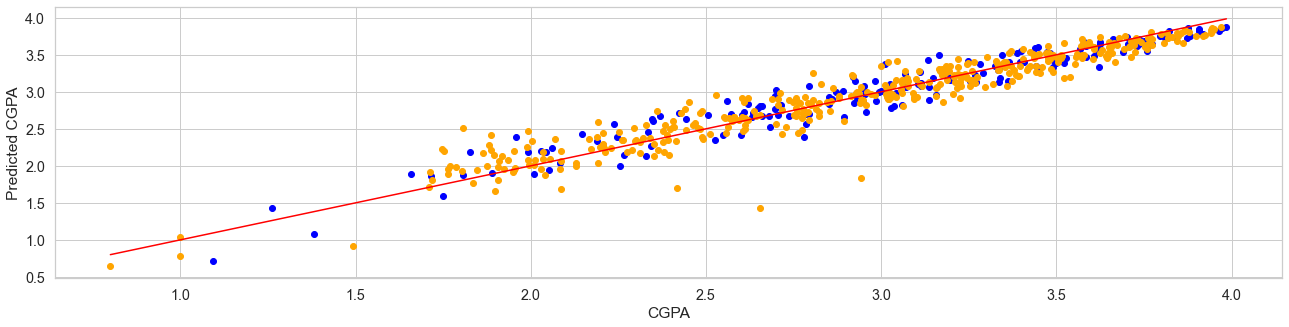

In [68]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([grades_df['CGPA'].min(), grades_df['CGPA'].max()], [grades_df['CGPA'].min(), grades_df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()

In [69]:
labels = grades_df['CGPA'].values
features = grades_df[list(model3_columns)].values

In [70]:

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

In [71]:
from sklearn import linear_model

lr_3 = linear_model.LinearRegression()

lr_3.fit(X_train, y_train)

LinearRegression()

In [72]:
y_train_predict = lr_3.predict(X_train)

y_test_predict = lr_3.predict(X_test)

In [73]:
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

mse_test = mean_squared_error(y_test, y_test_predict) 
mae_test = mean_absolute_error(y_test, y_test_predict) 
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_3.score(X_test, y_test) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))
     

The model performance for training set
RMSE is 0.12519811475162412
MAE is 0.07866433084264762
---------------------------------------
The model performance for testing set
RMSE is 0.16978386398845377
MAE is 0.09830500965473583
---------------------------------------
The score of model for testing set
Test score 0.93


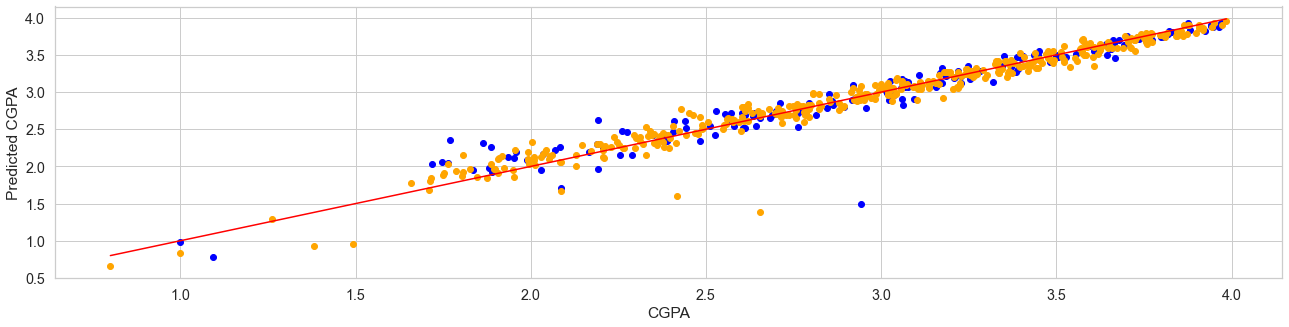

In [74]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([grades_df['CGPA'].min(), grades_df['CGPA'].max()], [grades_df['CGPA'].min(), grades_df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()
     

In [75]:
labels = grades_df['CGPA'].values
features = grades_df[list(model1_columns)].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_1.fit(X_train, y_train)
y_pred = rf_1.predict(X_test)

In [78]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_1.score(X_test, y_test))

Mean Absolute Error: 0.20248391304347832
Mean Squared Error: 0.0617916635
Root Mean Squared Error: 0.24857929016714164
The score of model for testing set 0.8223198987411774


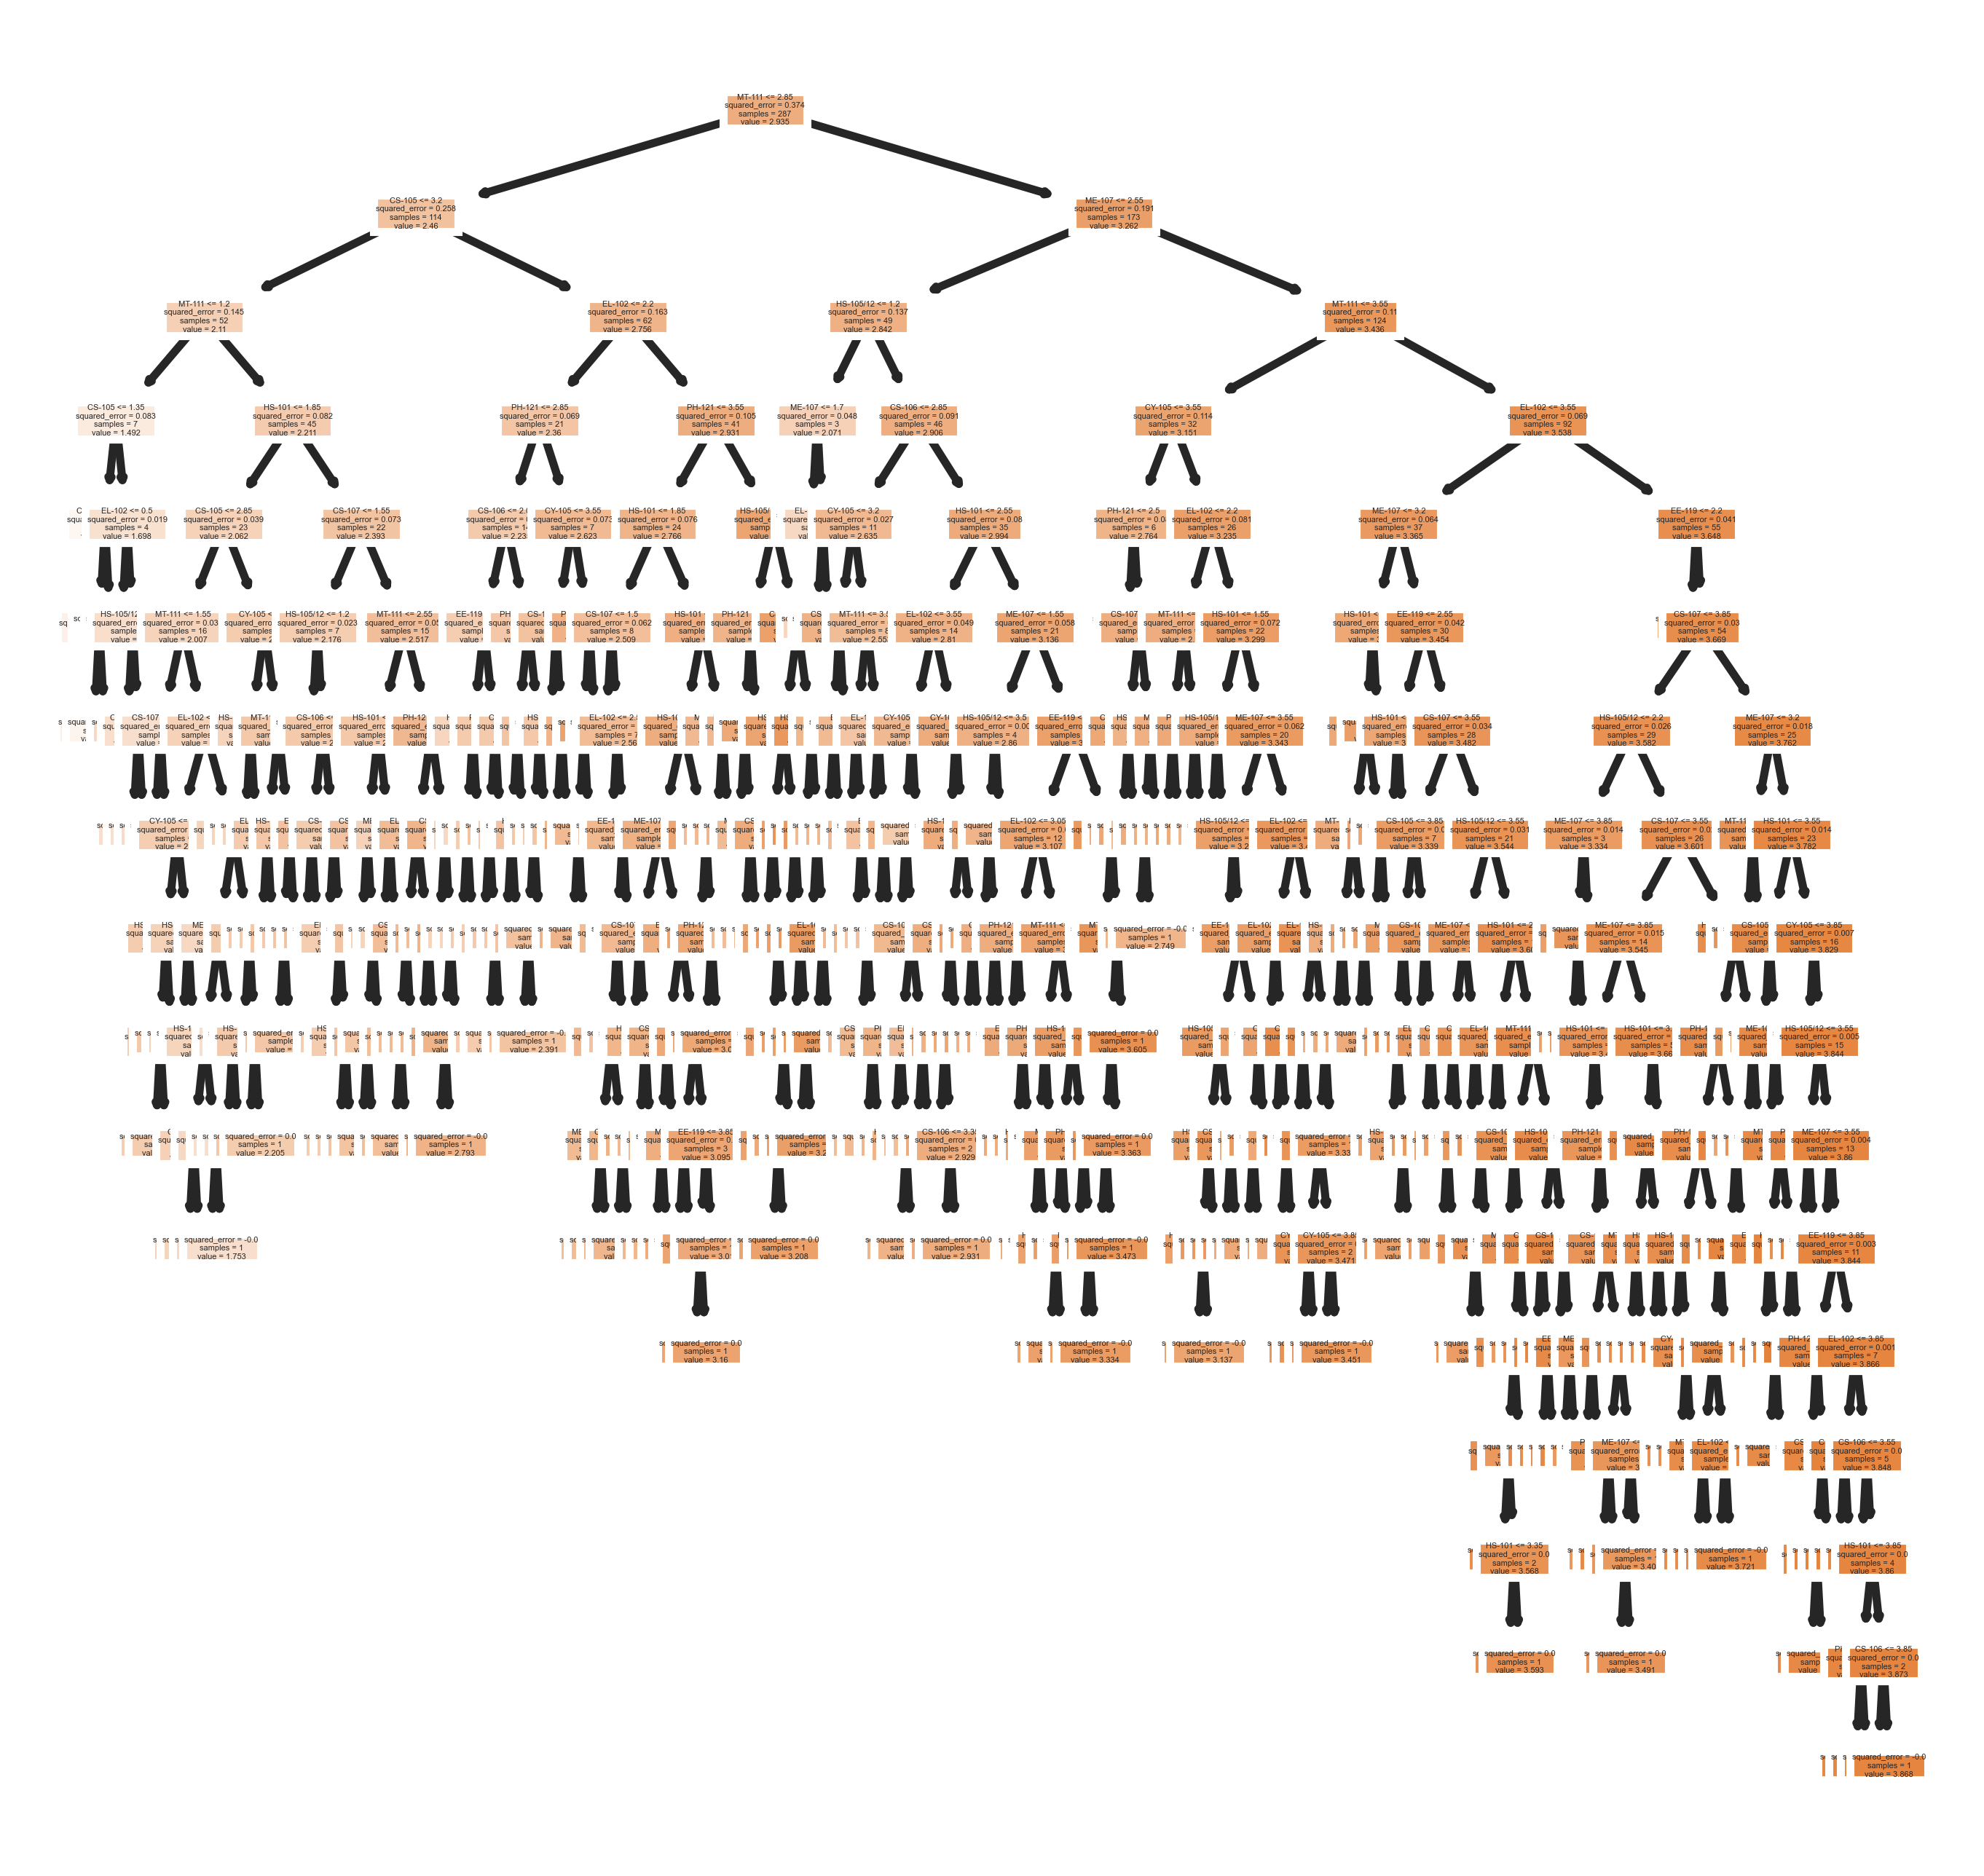

In [79]:
from sklearn import tree
fn=model1_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_1.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')
     

In [80]:
labels = grades_df['CGPA'].values
features = grades_df[list(model2_columns)].values
     

In [81]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [82]:
rf_2 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_2.fit(X_train, y_train)
y_pred = rf_2.predict(X_test)

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_2.score(X_test, y_test))

Mean Absolute Error: 0.1268378260869566
Mean Squared Error: 0.027115189586956558
Root Mean Squared Error: 0.16466690495347436
The score of model for testing set 0.9220310741195272


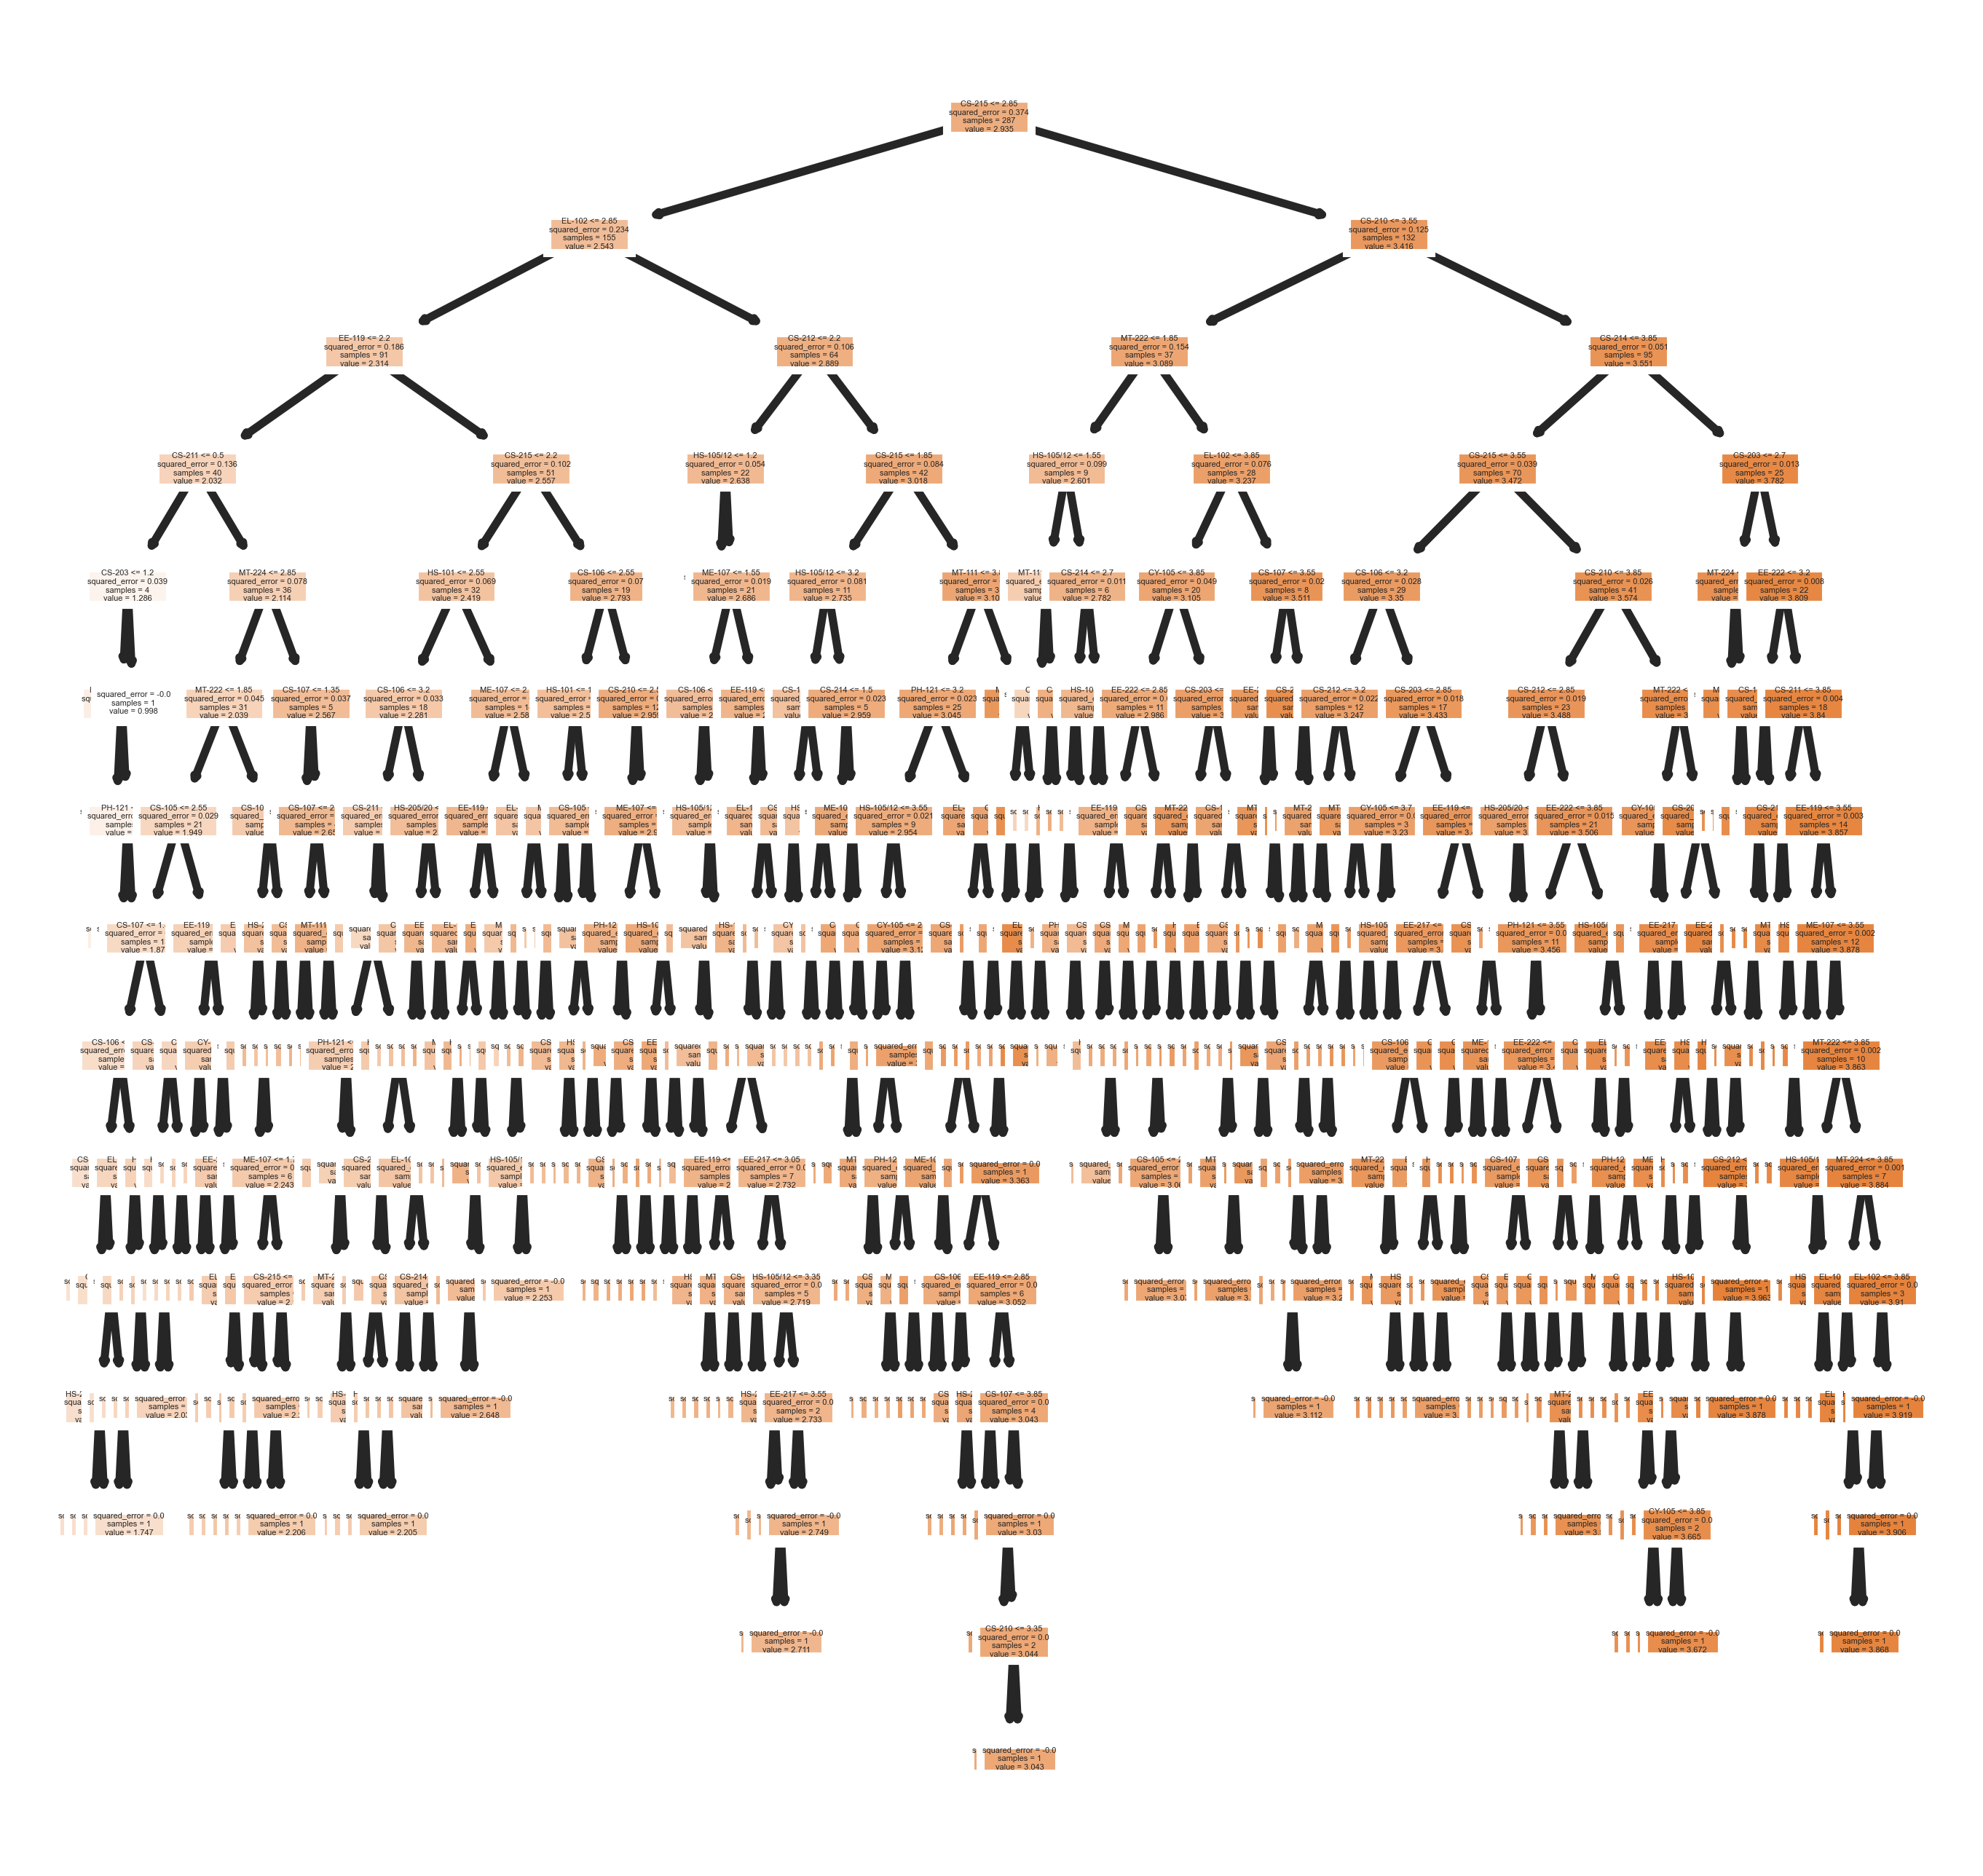

In [84]:
fn=model2_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_2.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_model2_individualtree.png')
     

In [85]:
labels = grades_df['CGPA'].values
features = grades_df[list(model3_columns)].values
     

In [86]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [87]:
rf_3 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_3.fit(X_train, y_train)
y_pred = rf_3.predict(X_test)

In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_3.score(X_test, y_test))

Mean Absolute Error: 0.0980052173913044
Mean Squared Error: 0.016982050608695672
Root Mean Squared Error: 0.13031519715173542
The score of model for testing set 0.9511686156218225


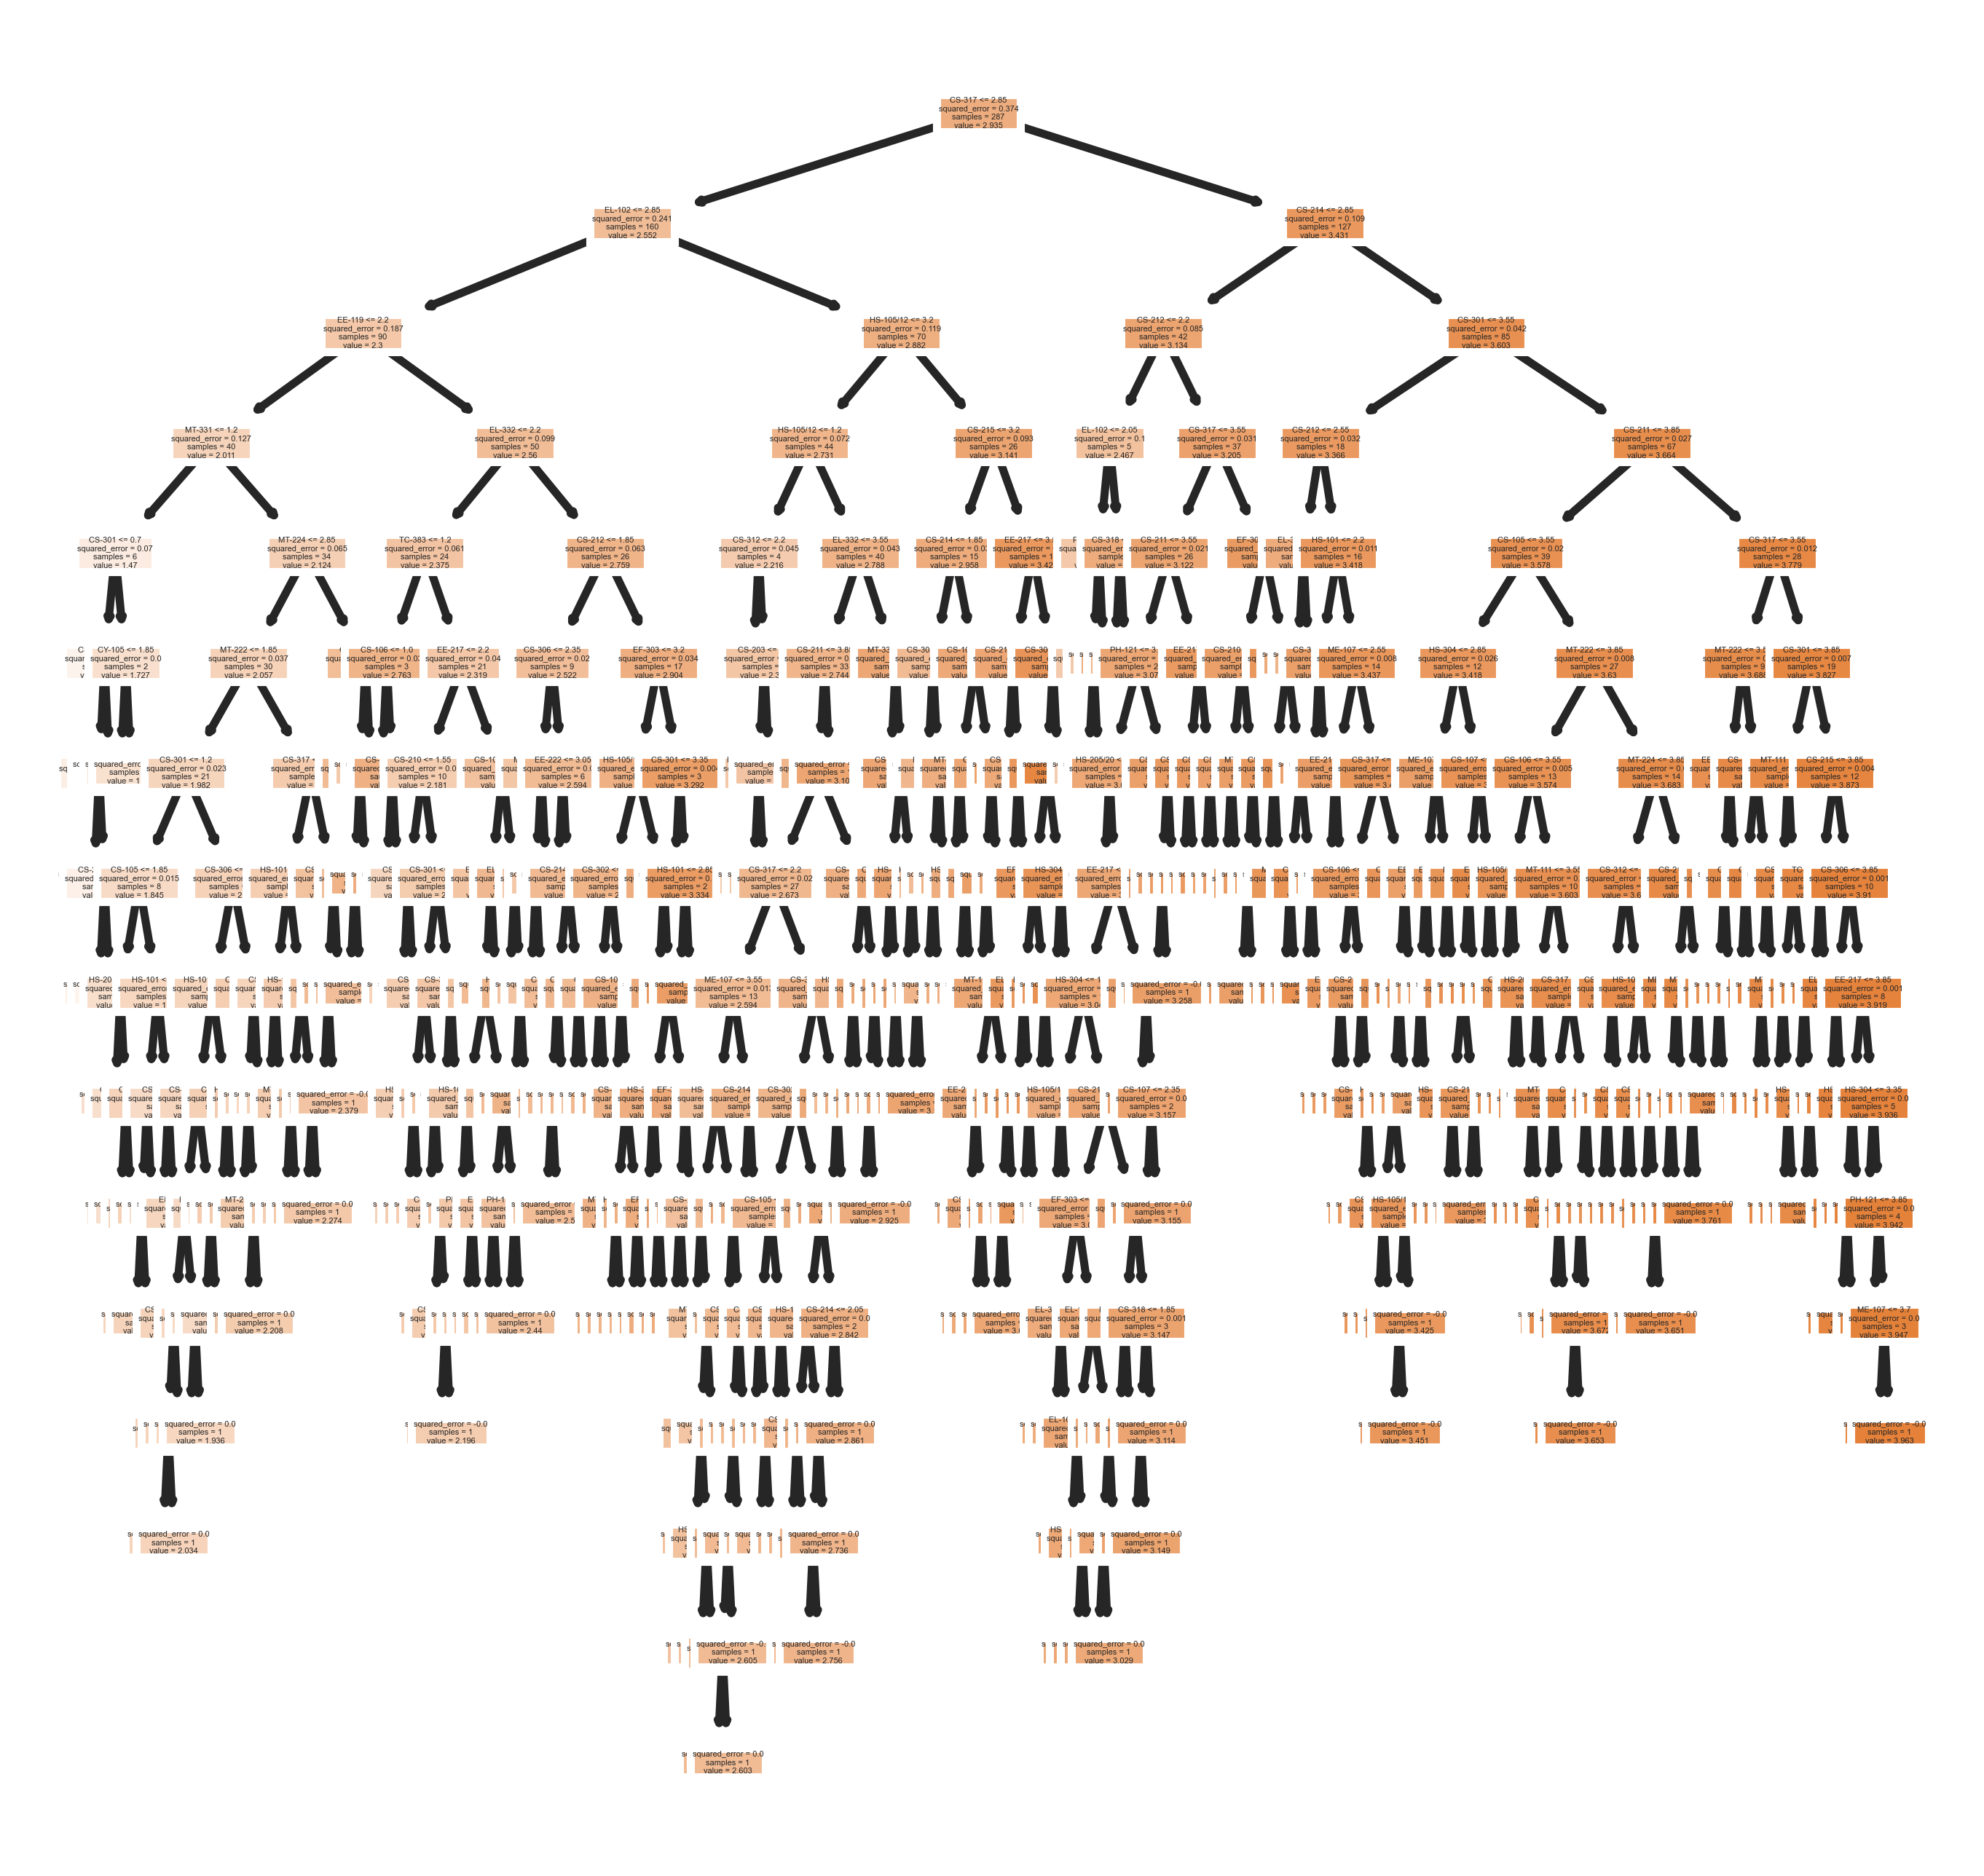

In [89]:
fn=model3_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_3.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_model3_individualtree.png')

In [90]:
del input

In [ ]:
print("-----------------------------------------------------------")
print("-------------Hello from GPA Predictor----------------------")
print("-----------------------------------------------------------")
model_1=[]
model_2=[]
model_3=[]
input_lr=[]
name = input ("What is your name? ")
model = int(input ("From which model would you like to predict your GPA ? "))
if model == 1:
  for val in model1_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_1.append(grades_enc[GPA])
     else:
       model_1.append(0)
  input_lr.append(model_1)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_1.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_1.predict(input_lr)}")
elif model == 2:
  for val in model2_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_2.append(grades_enc[GPA])
     else:
       model_2.append(0)

  input_lr.append(model_2)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_2.predict(input_lr)}" )
  print(f"{name}, Your predictive CGPA according to Random Forest Algorithm is :{rf_2.predict(input_lr)}" )
elif model == 3:
  for val in model3_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_3.append(grades_enc[GPA])
     else:
       model_3.append(0)
  input_lr.append(model_3)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is : {lr_3.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_3.predict(input_lr)}" )
else:
   print("Kindly enter valid value")

print("Have a nice day !!")

-----------------------------------------------------------
-------------Hello from GPA Predictor----------------------
-----------------------------------------------------------


# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train=pd.read_csv("banktrain.csv")
test=pd.read_csv("banktest.csv")

In [ ]:
train.columns

In [ ]:
test.columns

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train.tail()

In [ ]:
test.tail()

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train['subscribed'].value_counts()

In [ ]:
sns.countplot(data=train, x='subscribed')

In [ ]:
train['subscribed'].value_counts(normalize=True)

In [ ]:
train['job'].value_counts()

In [ ]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [ ]:
train['marital'].value_counts()

In [ ]:
sns.countplot(data=train, x='marital');

In [ ]:
sns.countplot(data=train, x='marital', hue='subscribed');

In [ ]:
sns.distplot(train['age']);

In [ ]:
print(pd.crosstab(train['job'],train['subscribed']))

In [ ]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

In [ ]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

In [ ]:
pd.crosstab(train['marital'], train['subscribed'])

In [ ]:
marital = pd.crosstab(train['marital'], train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

In [ ]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

In [ ]:
pd.crosstab(train['default'], train['subscribed'])

In [ ]:
dflt = pd.crosstab(train['default'], train['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

In [ ]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

In [ ]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [ ]:
train['subscribed']

In [ ]:
tc = train.corr()
tc

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

In [ ]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [ ]:
train = pd.get_dummies(train)
train.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lreg = LogisticRegression()

In [ ]:
lreg.fit(X_train,y_train)

In [ ]:
pred = lreg.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val,pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
predict = clf.predict(X_val)
predict

In [ ]:
accuracy_score(y_val,predict)

In [ ]:


test = pd.get_dummies(test)
test.head()



In [ ]:
test_pred = clf.predict(test)
test_pred

In [ ]:
submissions = pd.DataFrame()

In [ ]:


submissions['ID'] = test['ID']
submissions['subscribed'] = test_pred

In [ ]:
submissions['subscribed']

In [ ]:
submissions['subscribed'].replace(0,'no',inplace=True)
submissions['subscribed'].replace(1,'yes',inplace=True)

In [ ]:
submissions['subscribed']

In [ ]:
submissions.to_csv('submission file.csv', header=True, index=False)